[Trend](https://www.kaggle.com/code/ryanholbrook/trend)  
이동 평균과 시간 더미로 장기적인 변화 모델링.


# What is Trend?
시계열의 **추세(Trend)** 성분은 시계열의 평균에서 지속되는 변화를 나타낸다.  
추세는 시리즈에서 가장 느리겡 이동하는 부분이며, 가장 중요한 시간 척도를 나타내는 부분이다.  
제품 판매의 시계열에서 증가하는 추세는 해마다 더 많은 사람들이 제품에 대해 알게 됨에 따라 시장 확장의 효과를 나타낼 수 있다.

![nn](https://i.imgur.com/ZdS4ZoJ.png)

<div align='center'>4가지 시계열의  추세 패턴</div>

이 과정에서는 평균적인 추세에 초점을 맞출 것이다. 그러나 일반적으로 시계열의 지속적이고 느린 변화는 추세를 구성할 수 있다.  
(일반적으로 시계열은 일반적으로 변동 추세가 있다.)

# Moving Average Plots (이동평균도표)
시계열의 추세 유형을 확인하려면 **이동 평균 그림(Moving Average Plot)**을 사용할 수 있다.  
시계열의 이동 평균을 계산하기 위해 정의된 너비의 슬라이딩 창 내 값의 평균을 계산한다.   
그래프의 각 포인트는 양쪽 창 안에 있는 시계열의 모든 값의 평균을 나타낸다.   
시리즈의 단기적 변동은 모두 원만히 처리해 장기적 변화만 남도록하자는 취지이다. 

![nn](https://i.imgur.com/EZOXiPs.gif)
*선형 추세를 나타내는 이동 평균도이다. 곡선의 각 점(blue)은 12 크기의 창 안에 있는 점(red)의 평균이다.*

위 *Mauna Loa* 시리즈가 어떻게 해마다(단기적 계절 변화) 오르락내리락 반복하는지 주목해보자.  
변화가 추세에 포함되려면 계절적 변화보다 오랜 기간에 걸쳐 발생해야 한다.  
따라서 추세를 시각화하기위해 시계열의 계절적 기간보다 긴 기간 동안 평균을 취한다.  
*Mauna Loa* 시리즈의 경우, 매년 시즌을 매끄럽게 하기 위해 12size의 창으로 선택했다. 

# Engineering Trend
추세의 모양을 식별하면 time-step feature를 사용해 모델링을 시도할 수 있다.  
우리는 이미 시간 더미 자체를 사용해 선형 추세를 모델링하는 방법을 보았다.  
  
  
$$target = a * time + b$$
우리는 타임 더미의 변환을 통해 다른 많은 종류의 추세에 맞출 수 있다.   
추세가 2차(포물선)인 경우, feature 집합에 시간 더미의 제곱을 더하면 다음과 같이 된다. 
$$target = a * time^2 + b *time + c$$  
선형 회귀에서 계수 a,b 및 c를 학습한다.  
  
  
아래 그림의 추세 곡선은 이러한 종류의 특징과 sickit-learn의 **선형 회귀(LinearRegression)**를 사용해 모두 적합시켰다. 
![nn](https://i.imgur.com/KFYlgGm.png)
<div align='center'><b>Top</b>: 선형 추세로 된 시리즈. <b>Below</b>:2차 추세가 있는 시계열</div>

이전에 트릭을 본 적 없다면 선형 회귀가 선 이외의 곡선에 적합할 수 있다는 것을 깨닫지 못했을 수 있다.  
이 아이디어는 적절한 모양의 곡선을 feature로 제공할 수 있는 경우, 선형 회귀 분석을 통해 목표갑셍 가장 적합한 방식으로 곡선을 결합하는 방법을 배울 수 있다는 것이다.  

# Example - Tunnel Traffic
예시에서 *Tunnel Traffic*데이터를 사용해 추세 모델을 생성할 것이다. 

In [2]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore') # output cell에 출력되는 경고를 무시한다.  

# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(11,5))
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10
)

plot_params=dict(
    color='0.75',
    style='.-',
    markeredgecolor='.25',
    markerfacecolor='.25',
    legend=False,
)

%config InlineBackend.figure_format='retina'

# Load Tunnel Traffic dataset
tunnel=pd.read_csv('data/tunnel.csv', parse_dates=['Day'])
tunnel=tunnel.set_index('Day').to_period()

이동 평균 그림을 만들어 이 시리즈가 어떤 추세를 가지고 있는지 알아보자.  
이 시리즈는 매일 관찰했으므로 365일 기간을 선택해 1년 중 단기적인 변화를 매끄럽게 처리해보자.  

이동 평균을 만들려면 먼저 **롤링(rolling)** 방법을 사용해 창(window) 계산을 시작한다.  
이 방법에 따라 창에 대한 **평균(mean)**을 계산한다.  
보다시피 *Tunnel Traffic* 추세는 선형에 가깝다. 

In [3]:
tunnel.rolling(
    window=365,        # 365-day window
    center=True,       # puts the average at the center of the window
    min_periods=183,   # choose about half the window size
).mean()

,NumVehicles
Day,
2003-11-01,99127.426230
2003-11-02,99094.489130
2003-11-03,99112.481081
2003-11-04,99146.639785
2003-11-05,99196.122995
...,...
2005-11-12,112995.689840
2005-11-13,113058.763441
2005-11-14,113195.718919


<AxesSubplot:title={'center':'Tunnel Traffic - 365 Day Moving Average'}, xlabel='Day'>

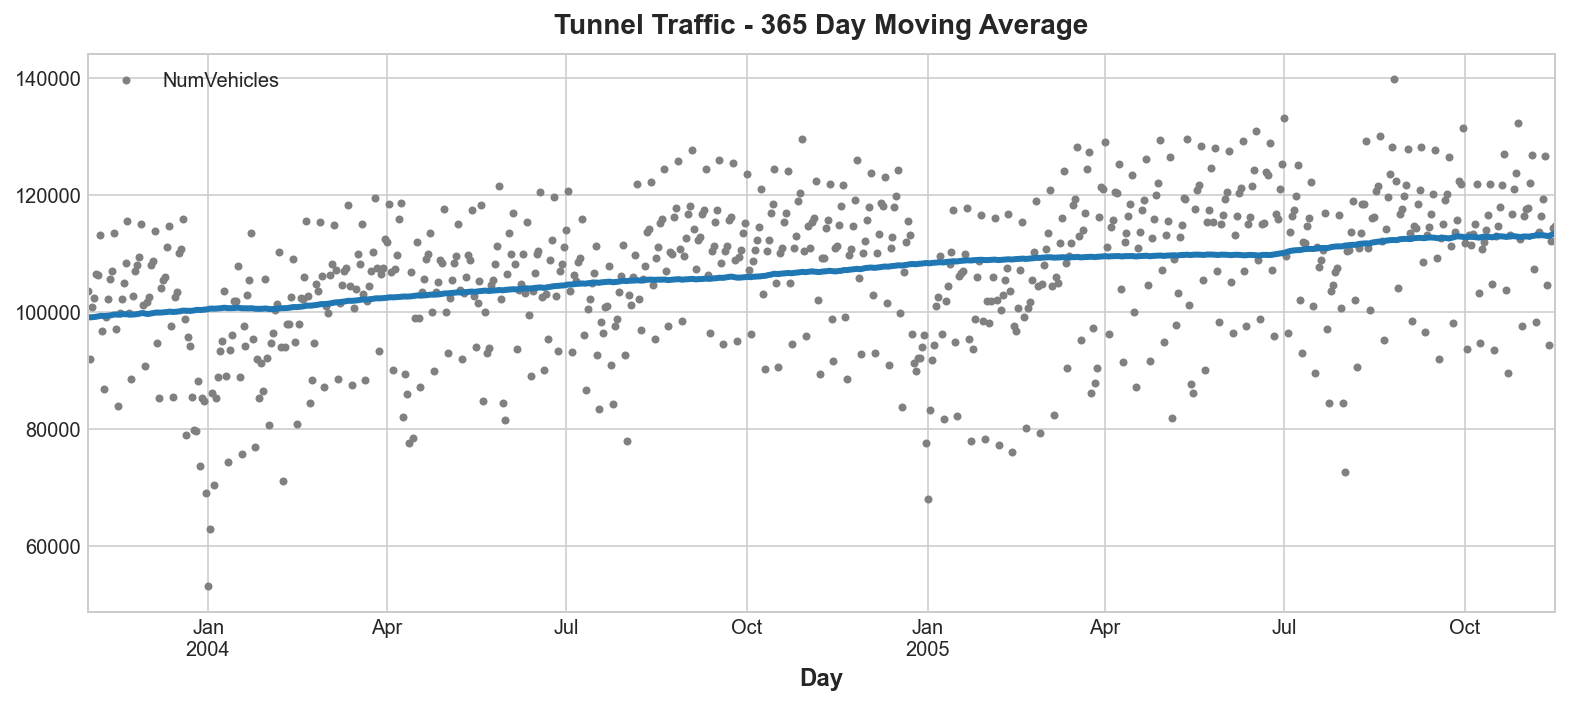

In [4]:
moving_average=tunnel.rolling(
    window=365,        # 365-day window
    center=True,       # puts the average at the center of the window
    min_periods=183,   # choose about half the window size
).mean()               # compute the mean (could also do median, ste, min, max, ...)

ax=tunnel.plot(style='.', color='.5')
moving_average.plot(
    ax=ax, linewidth=3, title='Tunnel Traffic - 365 Day Moving Average', legend=False
)

1장에서 우리는 pandas에서 직접 시간 더미를 설계했다.  
그러나 지금부터는 **DeterministicProcess**라는 **statemodels** 라이브러리의 함수를 사용한다.  
이 함수를 사용하면 시계열 및 선형 회귀에서 발생할 수 있는 까다로운 실패 사례를 피할 수 있다.  
**order** 인수는 다항식 차수를 나타낸다.  
1은 선형, 2는 2차, 3은 3차 등이다. 

In [8]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index,  # dates from the training data
    constant=True,       # dummy feature for the bias(y_intercept)
    order=1,             # the time dummy(trend)
    drop=True,           # drop terms if necessary to avoid collinearity, 공성선을 피하기 위해 필요한 경우 항을 삭제
)

# 'in_sample' creates features for the dates given in the 'index' argument
X=dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


(*결정론적 공정*은 **상수** 및 **추세** 시리즈와 같이 랜덤하지 않거나, 완전히 결정된 시계열을 기술하는 용어이다.  
시간 지수에서 파생된 특징은 일반적으로 결정적이다.)  

fit_intercept=False 인수가 추가되었지만, 기본적으로 이전과 같이 추세 모델을 생성한다. 

In [9]:
from sklearn.linear_model import LinearRegression

y=tunnel['NumVehicles']  # the target

# DeterministicProcess의 절편(intercept)은 'const' 기능과 동일하다.
# LinearRegression은 중복된 기능에서 제대로 작동하지 않으므로 여기서 제외해야 한다.  
model=LinearRegression(fit_intercept=False)
model.fit(X,y)

y_pred=pd.Series(model.predict(X), index=X.index)

*LinearRegression* 모델에 의해 발견된 경향은 이동 평균 플롯과 거의 동일하며, 이는 이 경우 선형 추세가 올바른 결정이었음을 나타낸다. 

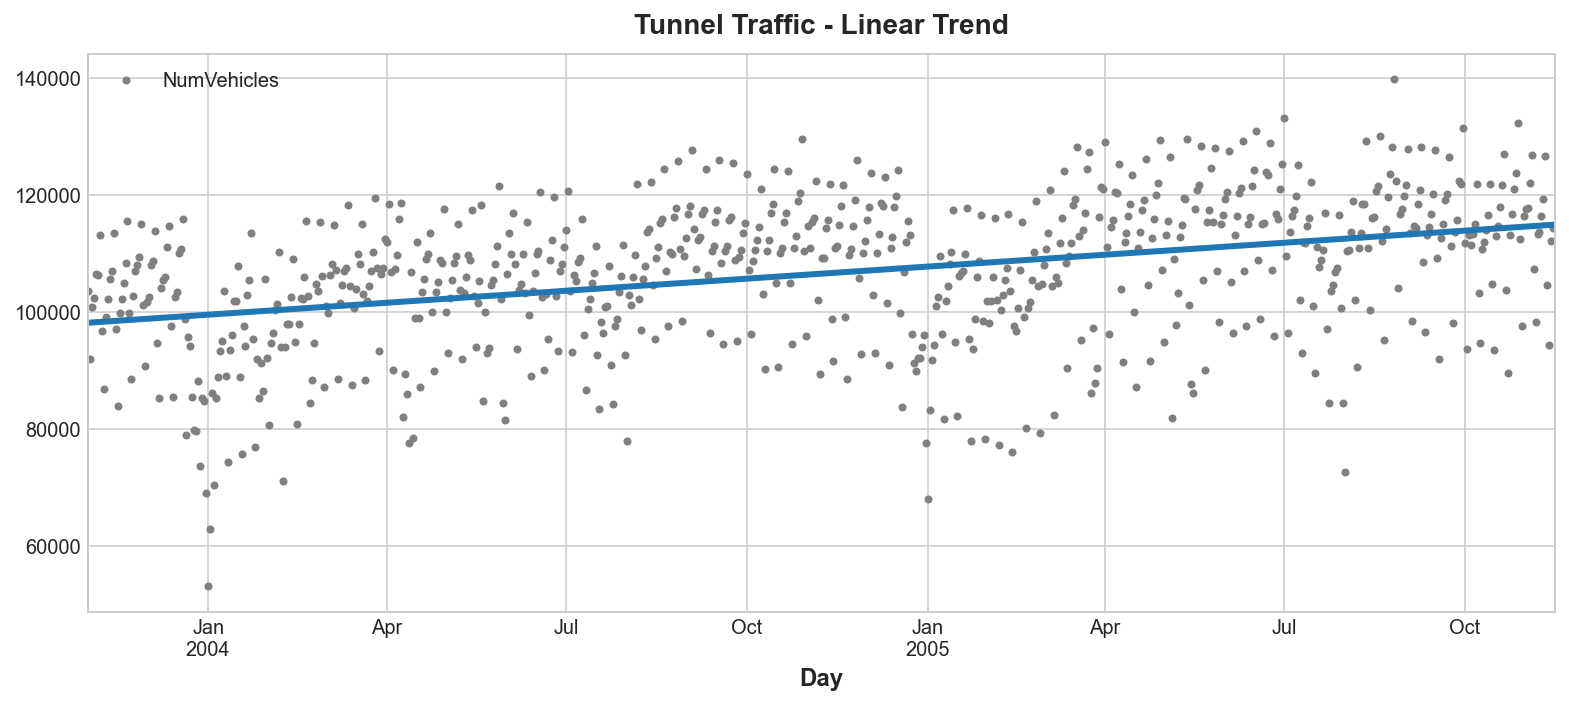

In [15]:
ax=tunnel.plot(style='.', color='.5', title='Tunnel Traffic - Linear Trend')
_ = y_pred.plot(ax=ax, linewidth=3, label='Trend')

예측을 하기 위해 **"표본 외(Out of Sample)"** feature에 모델을 적용한다.  
"표본 외(Out of Sample)"는 훈련 데이터의 관찰 기간을 벗어난 시간을 나타낸다.  
30일 예측을 하는 방법은 다음과 같다. 

In [21]:
X=dp.out_of_sample(steps=30)
y_fore=pd.Series(model.predict(X), index=X.index)
y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

다음 30일 동안의 추세 예측을 보기 위해 시리즈의 일부를 플로팅해보자.

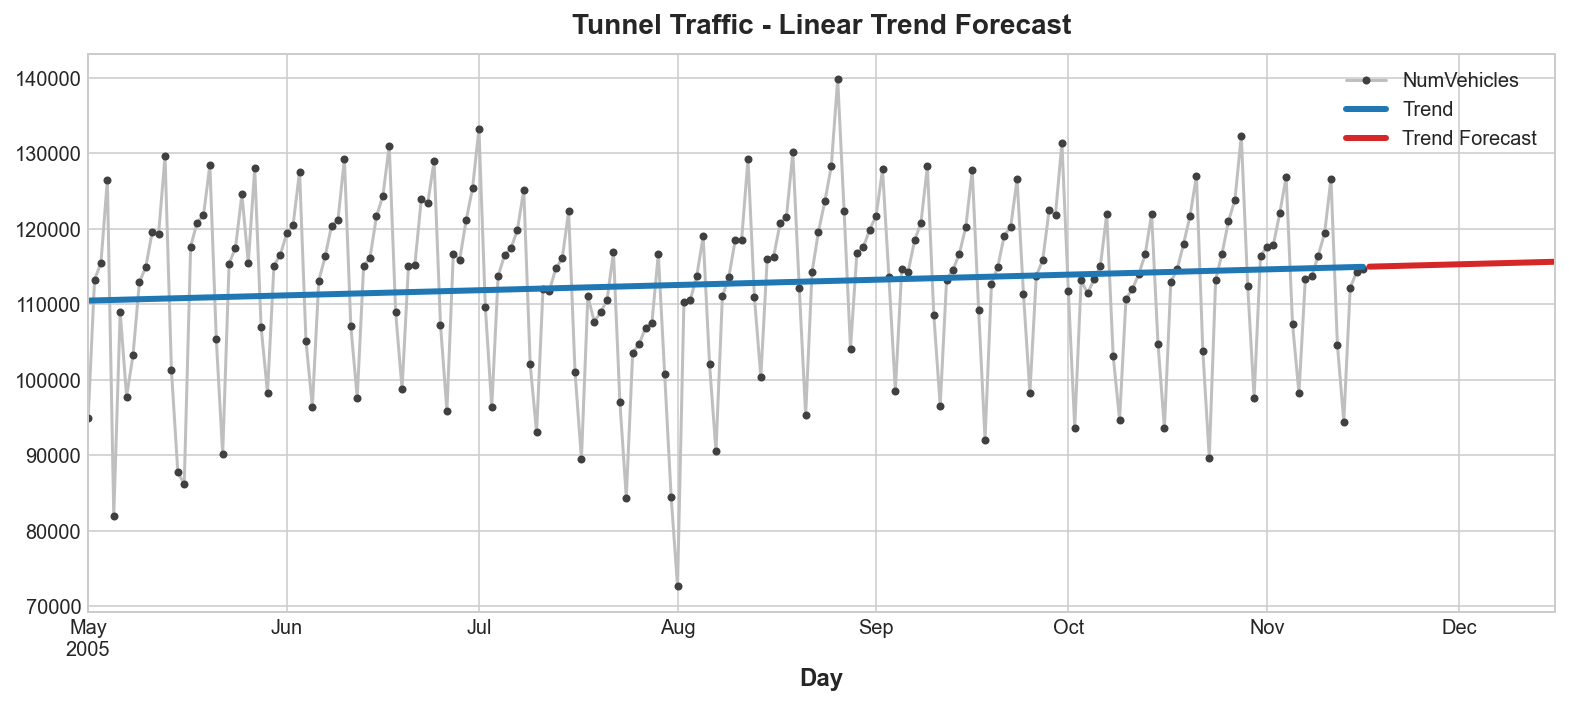

In [28]:
ax=tunnel['2005-05':].plot(title='Tunnel Traffic - Linear Trend Forecast', **plot_params)
ax=y_pred['2005-05':].plot(ax=ax, linewidth=3, label='Trend')
ax=y_fore.plot(ax=ax, linewidth=3, label='Trend Forecast', color='C3')
_=ax.legend()

----
이 수업에서 배운 트렌드 모델은 여러 가지 이유로 유용한 것으로 밝혀졌다.  
보다 정교한 모델의 기준점 또는 시작점 역할을 할 뿐 아니라, 추세(XGBoost 및 랜덤 포레스트)를 학습할 수 없는 알고리즘이 있는 '하이브리드 모델'의 구성 요소로 사용할 수 있다.  
이 기법에 대해서는 5과에서 자세히 알아보도록 하자.